# CRIME AGAINST WOMEN IN INDIA VISUALISATION

This project contains the data record of all the crimes against women in the YEAR 2001-2014.The main aim of this project is to show how women in our society are suffering.The dataset used for this analysis was taken from https://www.kaggle.com/greeshmagirish/crime-against-women-20012014-india.
The most powerful tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib and Seaborn. All of these tools were meaningfully and efficiently taught in the course "Data Analysis with Python: Zero to Pandas" given by Jovian in partnership with freeCodeCamp.

In [67]:
!pip install jovian opendatasets --upgrade --quiet

In [68]:
import jovian

In [69]:
jovian.commit(project='crime-against-women-visualisation', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/crime-against-women-visualisation" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/crime-against-women-visualisation


'https://jovian.ai/monisharajak2001/crime-against-women-visualisation'

In [70]:
!pip install pandas --upgrade
!pip install matplotlib
!pip install seaborn

Requirement already up-to-date: pandas in /opt/conda/lib/python3.8/site-packages (1.2.4)


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing data

In [72]:
# Change this
dataset_url = 'https://www.kaggle.com/greeshmagirish/crime-against-women-20012014-india' 

In [73]:
import os

In [74]:
import urllib.request

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [75]:
project_name = "crime-against-women-visualisation" # change this (use lowercase letters and hyphens only)

In [76]:
!pip install jovian --upgrade -q

In [77]:
import jovian

In [78]:
jovian.commit(project='crime-against-women-visualisation', environment = None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/crime-against-women-visualisation" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/crime-against-women-visualisation


'https://jovian.ai/monisharajak2001/crime-against-women-visualisation'

## Data Preparation and Cleaning





In [79]:
crimes_df = pd.read_csv('crimes_against_women_2001-2014.csv')

In [80]:
type(crimes_df)

pandas.core.frame.DataFrame

In [81]:
crimes_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [82]:
crimes_df.shape

(10677, 11)

# Data Preparation and Cleaning

### To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values

In [83]:
overall_crime = crimes_df.isna().sum()

In [84]:
overall_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

##### None of the columns have null values

##### Now let's find out the total number of unique districts,where the crimes have been committed.


In [85]:
districts = len(crimes_df.DISTRICT.unique())

In [86]:
districts

1605

We will drop the district columns 'DISTRICT' and 'UNNAMED: 0' as its of no use.  

In [87]:
crimes_df.drop(['DISTRICT','Unnamed: 0'], axis = 1 , inplace = True)

In [88]:
crimes_df

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [89]:
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)

In [90]:
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


Now let's analyse the datas of column 'STATE/UT'.


In [91]:
print(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


We see a lot of repeated data so we will remove them.

In [92]:
#first we will remove all trhe repeated upper-case values

def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

In [93]:
#now we will use the replace data to replace other types of repeated datas
crimes_df['STATE/UT'].replace("A&N ISLANDS","A & N ISLANDS",inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI","D & N HAVELI",inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT","DELHI",inplace = True)

In [94]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [95]:
len(crimes_df['STATE/UT'].unique())

36

In [96]:
import jovian

In [97]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/crime-against-women-visualisation" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/crime-against-women-visualisation


'https://jovian.ai/monisharajak2001/crime-against-women-visualisation'

## Exploratory Analysis and Visualization

Let us find out the total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.


In [98]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_womens_modesty.sum()
domestic_violence = crimes_df.Domestic_Cruelty.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

In [99]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [100]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## NOW LET US ANALYSE THE DATA YEAR WISE


### 1. RAPE

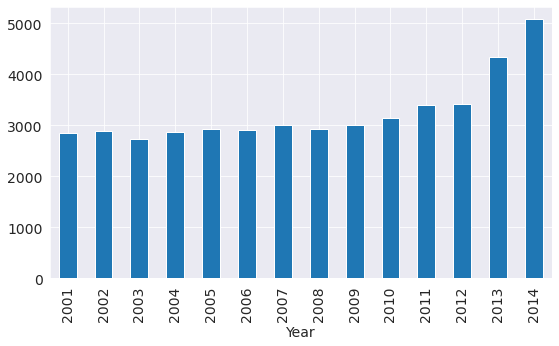

In [101]:
crimes_df.groupby(by=crimes_df["Year"])["Rape"].max().plot(kind="bar")
plt.show()


### 2.KIDNAPPING AND ABDUCTION

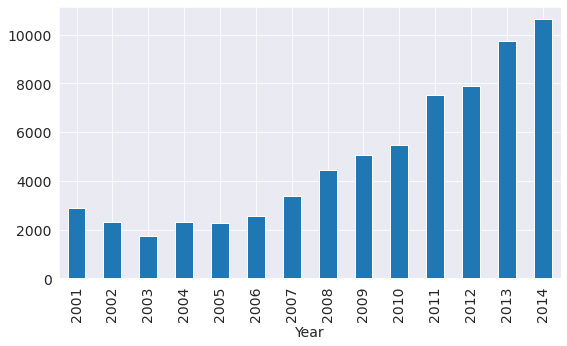

In [102]:
crimes_df.groupby(by=crimes_df["Year"])["Kidnapping_Abduction"].max().plot(kind="bar")
plt.show()

### 3.DOWRY DEATHS

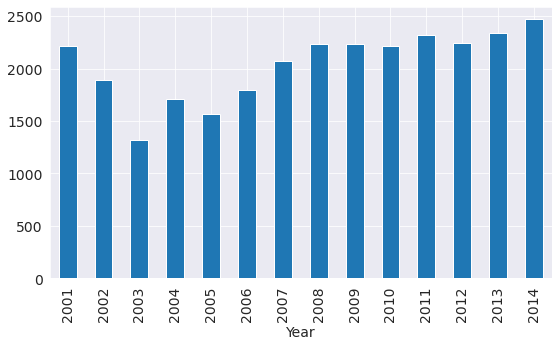

In [103]:
crimes_df.groupby(by=crimes_df["Year"])["Dowry_Deaths"].max().plot(kind="bar")
plt.show()

### 4.Hurting of women modesty

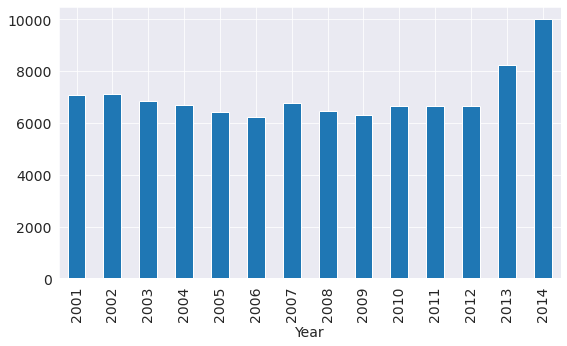

In [104]:
crimes_df.groupby(by=crimes_df["Year"])["Hurting_of_womens_modesty"].max().plot(kind="bar")
plt.show()

### 5.INSULT TO WOMENS MODESTY

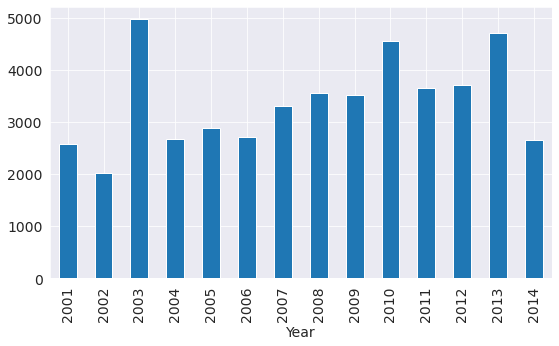

In [105]:
crimes_df.groupby(by=crimes_df["Year"])["Insult_to_womens_modesty"].max().plot(kind="bar")
plt.show()

### 6.DOMESTIC CRUELTY

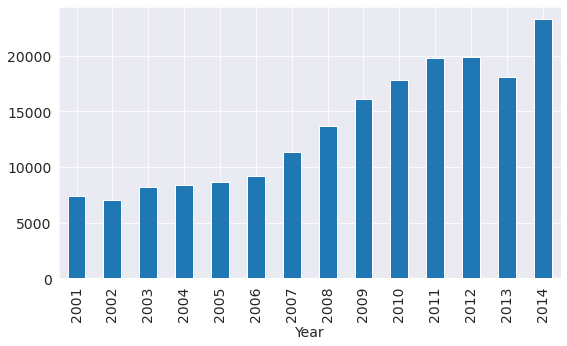

In [106]:
crimes_df.groupby(by=crimes_df["Year"])["Domestic_Cruelty"].max().plot(kind="bar")
plt.show()

### 7.IMPORTATION OF GIRLS

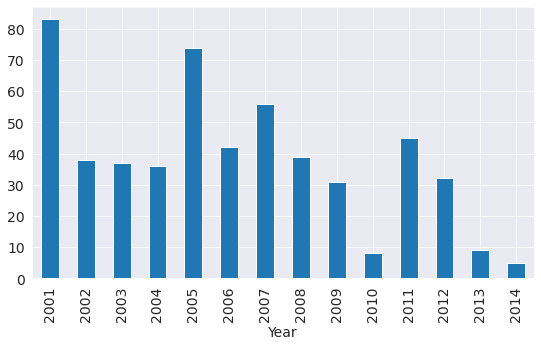

In [107]:
crimes_df.groupby(by=crimes_df["Year"])["Importation_of_Girls"].max().plot(kind="bar")
plt.show()

There are two things to be concluded from the above bar chart -
1) The cases have incraesed over the years.

2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [108]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


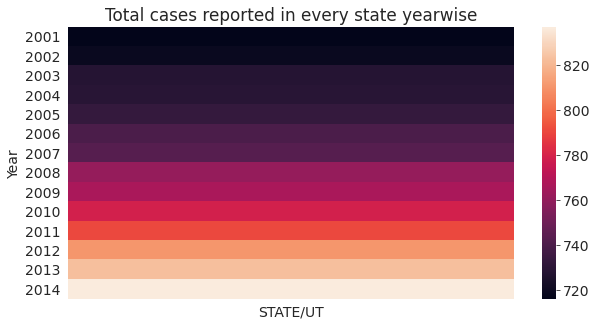

In [109]:
plt.figure(figsize = (10,5))
plt.title("Total cases reported in every state yearwise")
sns.heatmap(count_df);

This heatmap shows us that every year crime has only increased against women in India.

Let us save and upload our work to Jovian before continuing

In [110]:
import jovian

In [111]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/crime-against-women-visualisation" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/crime-against-women-visualisation


'https://jovian.ai/monisharajak2001/crime-against-women-visualisation'

## Asking and Answering Questions

Now we will try to raise questions about this data analysis and try to find out answer to them.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



In [113]:
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10673,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10674,PUDUCHERRY,2014,3,1,0,12,1,1,0
10675,PUDUCHERRY,2014,7,6,1,20,7,3,0


#### Q1: Find out the total number of cases, in span of 2001-2014 under each category, state wise.

In [116]:
counts_df = crimes_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty', 'Importation_of_Girls','Hurting_of_womens_modesty','Insult_to_womens_modesty']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
A & N ISLANDS,336,212,20,288,0,600,112
ANDHRA PRADESH,32150,34504,13844,280906,34,126952,86964
ARUNACHAL PRADESH,1316,1470,6,476,0,1996,48
ASSAM,40190,62074,3268,115300,22,38256,254
BIHAR,30758,57086,32206,69770,904,16958,694
CHANDIGARH,770,1682,90,2080,0,1088,342
CHHATTISGARH,29308,11808,2758,23436,12,47096,3968
D & N HAVELI,132,224,2,90,0,106,12
DAMAN & DIU,60,44,6,76,0,40,4


#### Q2:  Find out the top 5 states, where maximum numbers of cases has been reported in TOTAL in span of 2001-2014, each category wise.

In [120]:
counts_df.sort_values(by = 'Rape', ascending = False).head(5)






,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
MADHYA PRADESH,90996,35608,21090,102816,134,195478,20964
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
MAHARASHTRA,48974,30368,9696,193202,6,114704,32634
WEST BENGAL,47876,61158,12308,344124,254,66908,5348
RAJASTHAN,45684,66278,11854,262200,14,83362,794


In [121]:
counts_df.sort_values(by = 'Kidnapping_Abduction', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
RAJASTHAN,45684,66278,11854,262200,14,83362,794
ASSAM,40190,62074,3268,115300,22,38256,254
WEST BENGAL,47876,61158,12308,344124,254,66908,5348
BIHAR,30758,57086,32206,69770,904,16958,694


In [122]:
counts_df.sort_values(by = 'Domestic_Cruelty', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
WEST BENGAL,47876,61158,12308,344124,254,66908,5348
ANDHRA PRADESH,32150,34504,13844,280906,34,126952,86964
RAJASTHAN,45684,66278,11854,262200,14,83362,794
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
MAHARASHTRA,48974,30368,9696,193202,6,114704,32634


In [123]:
counts_df.sort_values(by = 'Importation_of_Girls', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
BIHAR,30758,57086,32206,69770,904,16958,694
JHARKHAND,22826,14186,7896,23910,298,9898,566
WEST BENGAL,47876,61158,12308,344124,254,66908,5348
MADHYA PRADESH,90996,35608,21090,102816,134,195478,20964
KARNATAKA,15056,16262,7016,72706,94,65750,2276


In [124]:
counts_df.sort_values(by = 'Hurting_of_womens_modesty', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
MADHYA PRADESH,90996,35608,21090,102816,134,195478,20964
ANDHRA PRADESH,32150,34504,13844,280906,34,126952,86964
MAHARASHTRA,48974,30368,9696,193202,6,114704,32634
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
RAJASTHAN,45684,66278,11854,262200,14,83362,794


In [125]:
counts_df.sort_values(by = 'Insult_to_womens_modesty', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
ANDHRA PRADESH,32150,34504,13844,280906,34,126952,86964
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
MAHARASHTRA,48974,30368,9696,193202,6,114704,32634
TAMIL NADU,16660,30908,5060,45524,30,43404,21170
MADHYA PRADESH,90996,35608,21090,102816,134,195478,20964


#### Q3: Create a dataframe containing 10 highest reported domestic cruelty cases in India, in the span of year 2001-2014.


In [139]:
max_rape_cases = crimes_df.sort_values('Rape',ascending = False).head(10)
max_rape_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10244,MADHYA PRADESH,2014,5076,5688,733,9609,429,6451,0
9426,MADHYA PRADESH,2013,4335,2873,776,8252,736,4988,7
10445,RAJASTHAN,2014,3759,4421,408,5999,18,15905,0
10595,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0
10291,MAHARASHTRA,2014,3438,2457,279,10001,1575,7696,1
8611,MADHYA PRADESH,2012,3425,1127,743,6655,774,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,6665,762,3732,45
9628,RAJASTHAN,2013,3285,4047,453,4829,25,15094,1
7025,MADHYA PRADESH,2010,3135,1030,892,6646,918,3756,5
9472,MAHARASHTRA,2013,3063,1874,320,8132,2632,8542,0


#### Q4:  Create a dataframe containing 10 highest reported deaths caused by Dowry cases in India, in the span of year 2001-2014.

In [136]:
max_dowry_cases = crimes_df.sort_values('Dowry_Deaths',ascending = False).head(10)
max_dowry_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10595,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0
9760,UTTAR PRADESH,2013,3050,9737,2335,7303,25,8781,0
8132,UTTAR PRADESH,2011,2042,7525,2322,3455,3,7121,0
8938,UTTAR PRADESH,2012,1963,7910,2244,3247,8,7661,0
5796,UTTAR PRADESH,2008,1871,4439,2237,2955,3374,8312,0
6563,UTTAR PRADESH,2009,1759,5078,2232,2782,2524,8566,0
7342,UTTAR PRADESH,2010,1563,5468,2217,2793,11,7978,0
650,UTTAR PRADESH,2001,1958,2879,2211,2870,2575,7365,0
5040,UTTAR PRADESH,2007,1648,3363,2076,2522,2882,7650,0
1366,UTTAR PRADESH,2002,1415,2298,1893,2145,1887,5679,0


#### Q5: Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of dowry cases"

In [140]:
max_dowry_cases = max_dowry_cases.merge(max_rape_cases)
max_dowry_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,UTTAR PRADESH,2014,3467,10626,2469,8605,29,10471,0


Hence UttarPradesh has reported maximum cases in both categories

Let us save and upload our work to Jovian before continuing.

In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "monisharajak2001/crime-against-women-visualisation" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/monisharajak2001/crime-against-women-visualisation


'https://jovian.ai/monisharajak2001/crime-against-women-visualisation'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [143]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()